<a href="https://colab.research.google.com/github/Kennethfargose/Social-Network-Analysis-Leiden-University/blob/main/snacs_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import community

In [ ]:

import re


In [ ]:
#large=pd.read_csv("/home/kenneth/Downloads/twitter-larger.tsv", header=None,names=['Timestamp','Name','Tweet'], sep='\t')

#small=pd.read_csv("/home/kenneth/Downloads/twitter-small.tsv", header=None, names=['Timestamp','Name','Tweet'] ,sep='\t')
small=pd.read_csv('medium.in', header=None , names=['UserA', 'UserB'] ,sep=' ')

In [ ]:
d=small

In [ ]:
small.info

<bound method DataFrame.info of        UserA  UserB
0          2      1
1          2     10
2          2     20
3          2     29
4          2     33
...      ...    ...
12859   2235     10
12860   2236     10
12861   2237     10
12862   2238     10
12863   2239     10

[12864 rows x 2 columns]>

In [ ]:
d['Tweet']=d['Tweet'].apply(str)

KeyError: ignored

In [ ]:
#d['Mentions'] = d['Tweet'].str.extract('@([a-zA-Z0-9_]{1,15})', expand=True)

In [ ]:
d.head(15)

,UserA,UserB
0,2,1
1,2,10
2,2,20
3,2,29
4,2,33
5,2,38
6,2,73
7,2,90
8,2,101
9,2,124


In [ ]:
d['Mentions'] = d['Tweet'].str.findall('@([a-zA-Z0-9_]{1,15})')

In [ ]:
d2=d

#d2['Mentions']=d2['Mentions'].fillna('0')
#d2.head(15)

In [ ]:
#d2 = d2[d2.astype(str)['Mentions'] != '0']

In [ ]:
d2.head(15)

,Timestamp,Name,Tweet,Mentions
0,2009-06-08 21:49:38,irzhy,"Каждый год в августе я меняю сотовый, похоже с...",[]
1,2009-06-08 22:00:30,andrejbr,O que vocês acham: iPhone ou HTC TYTN II? #pes...,[]
2,2009-06-11 16:56:50,deldel22,How to cheat on any test easy http://bit.ly/10...,[]
3,2009-06-11 16:56:59,cameron987,@beatrizchavez A dork? NO way... you are. I ju...,[beatrizchavez]
4,2009-06-11 16:57:53,testfiets,#iPhone: iPhone 3G S: de jacht op simlockvrije...,[]
5,2009-06-11 16:58:25,sambarsanti,Swine Flu Letterman: An Italian iPhone Father'...,[]
6,2009-06-11 16:58:32,kshepherd,More iPhoneLaunchParty photos: @blakespot + @a...,"[blakespot, arnoldkim]"
7,2009-06-11 16:58:32,mieetwilight,Swine Flu Letterman: An Italian iPhone Father'...,[]
8,2009-06-11 16:58:37,phatemokid,@kerotab oh if you iphone people can dish it y...,[kerotab]
9,2009-06-11 16:58:39,ajcalderon,so many things to look forward to this month.....,[]


In [ ]:
d3=d2.explode('Mentions')


In [ ]:
d3.head(15)

,Timestamp,Name,Mentions
0,2009-06-08 21:49:38,irzhy,NaN
1,2009-06-08 22:00:30,andrejbr,NaN
2,2009-06-11 16:56:50,deldel22,NaN
3,2009-06-11 16:56:59,cameron987,beatrizchavez
4,2009-06-11 16:57:53,testfiets,NaN
5,2009-06-11 16:58:25,sambarsanti,NaN
6,2009-06-11 16:58:32,kshepherd,blakespot
6,2009-06-11 16:58:32,kshepherd,arnoldkim
7,2009-06-11 16:58:32,mieetwilight,NaN
8,2009-06-11 16:58:37,phatemokid,kerotab


In [ ]:
del d3['Tweet']

In [ ]:
d3

,Timestamp,Name,Mentions
0,2009-06-08 21:49:38,irzhy,NaN
1,2009-06-08 22:00:30,andrejbr,NaN
2,2009-06-11 16:56:50,deldel22,NaN
3,2009-06-11 16:56:59,cameron987,beatrizchavez
4,2009-06-11 16:57:53,testfiets,NaN
...,...,...,...
148814,2009-06-24 21:18:52,changabanga,NaN
148815,2009-06-24 21:18:55,movepittsburgh,NaN
148816,2009-06-24 21:18:56,tomboates,NaN
148817,2009-06-24 21:19:00,nedworking,NaN


In [ ]:
weight_co = d3.groupby(['Timestamp','Name', 'Mentions']).size()
d4 = weight_co.to_frame(name='Weights').reset_index()

In [ ]:
d4.drop_duplicates()

,Timestamp,Name,Mentions,Weights
0,2009-06-11 16:56:59,cameron987,beatrizchavez,1
1,2009-06-11 16:58:32,kshepherd,arnoldkim,1
2,2009-06-11 16:58:32,kshepherd,blakespot,1
3,2009-06-11 16:58:37,phatemokid,kerotab,1
4,2009-06-11 16:59:06,mstg0901,iphonefan,1
...,...,...,...,...
75292,2009-06-24 21:18:22,sales_man,mobiz24,1
75293,2009-06-24 21:18:23,t_mesiab,kmesiab,1
75294,2009-06-24 21:18:30,abelourjameson,stephenfry,1
75295,2009-06-24 21:18:49,iramo,TechCrunch,1


In [ ]:
d4.columns = ['Timestamp', 'Name', 'Mentions', 'Weight']
d5 = d4[d4['Weight'].notna()]
d5.to_csv('/content/drive/MyDrive/small_graph.tsv', sep='\t', index=False)

In [ ]:
s=pd.read_csv('/content/drive/MyDrive/small_graph.tsv' , sep='\t')

In [ ]:
s

,Timestamp,Name,Mentions,Weight
0,2009-06-11 16:56:59,cameron987,beatrizchavez,1
1,2009-06-11 16:58:32,kshepherd,arnoldkim,1
2,2009-06-11 16:58:32,kshepherd,blakespot,1
3,2009-06-11 16:58:37,phatemokid,kerotab,1
4,2009-06-11 16:59:06,mstg0901,iphonefan,1
...,...,...,...,...
75292,2009-06-24 21:18:22,sales_man,mobiz24,1
75293,2009-06-24 21:18:23,t_mesiab,kmesiab,1
75294,2009-06-24 21:18:30,abelourjameson,stephenfry,1
75295,2009-06-24 21:18:49,iramo,TechCrunch,1


In [ ]:
def graph(path  ):
 Y = nx.read_edgelist(path, create_using=nx.DiGraph(), nodetype=str)
 return Y

In [ ]:
st=graph(s)

In [ ]:
new_g = nx.DiGraph()

for idx, row in s.iterrows():
    new_g.add_edge(row['Name'], row['Mentions'], weight=row['Weight'], timestamp=row['Timestamp'])

In [ ]:
new_g.number_of_nodes()

65721

In [ ]:
new_g.number_of_edges()

68820

In [ ]:
nx.info(new_g)

'DiGraph with 65721 nodes and 68820 edges'

In [ ]:
nx.number_strongly_connected_components(new_g)

65341

In [ ]:
nx.number_weakly_connected_components(new_g)

10922

In [ ]:
b=nx.weakly_connected_components(new_g)

In [ ]:
b=[len(c) for c in sorted(nx.strongly_connected_components(new_g),key=len, reverse=False)]

In [ ]:
a_set = set(b)
number_of_unique_values = len(a_set)

In [ ]:
print(a_set)

{1, 2, 3, 4, 6, 8, 18, 51, 23}


In [ ]:
#print(set(b))


from collections import Counter

words = b

Counter(words).keys() # equals to list(set(words))
Counter(words).values() # counts the elements' frequency

dict_values([65085, 229, 18, 3, 2, 1, 1, 1, 1])

In [ ]:
a=[len(c) for c in sorted(nx.weakly_connected_components(new_g),key=len, reverse=False)]

In [ ]:
a_2set = set(a)
number_of_unique_values = len(a_2set)
print(a_2set)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 27, 36, 38, 39761}


In [ ]:
'https://stackoverflow.com/questions/12282232/how-do-i-count-occurrence-of-unique-values-inside-a-list
'''https://stackoverflow.com/questions/26238723/largest-weakly-connected-component-in-networkx


In [ ]:
from collections import Counter

words = a

Counter(words).keys() # equals to list(set(words))
Counter(words).values() # counts the elements' frequency

dict_values([111, 8567, 1429, 405, 172, 94, 49, 29, 18, 15, 11, 2, 3, 4, 3, 2, 2, 1, 1, 1, 1, 1, 1])

In [ ]:
nx.density(new_g)


1.592869524457314e-05

In [ ]:
nx.average_clustering(new_g)

0.02024207969767717

In [ ]:
Gi = nx.DiGraph(new_g)
ind=[Gi.in_degree(n) for n in Gi.nodes()]
otd=[Gi.out_degree(n) for n in Gi.nodes()]
ind_count=Counter(ind)
out_count=Counter(otd)

In [ ]:
def degree_dis(Gi, in_degree=False, out_degree=False):#large

    nodes = Gi.nodes()
    if in_degree:
        in_degree = dict(Gi.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(Gi.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in Gi.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Text(0, 0.5, 'Frequency')

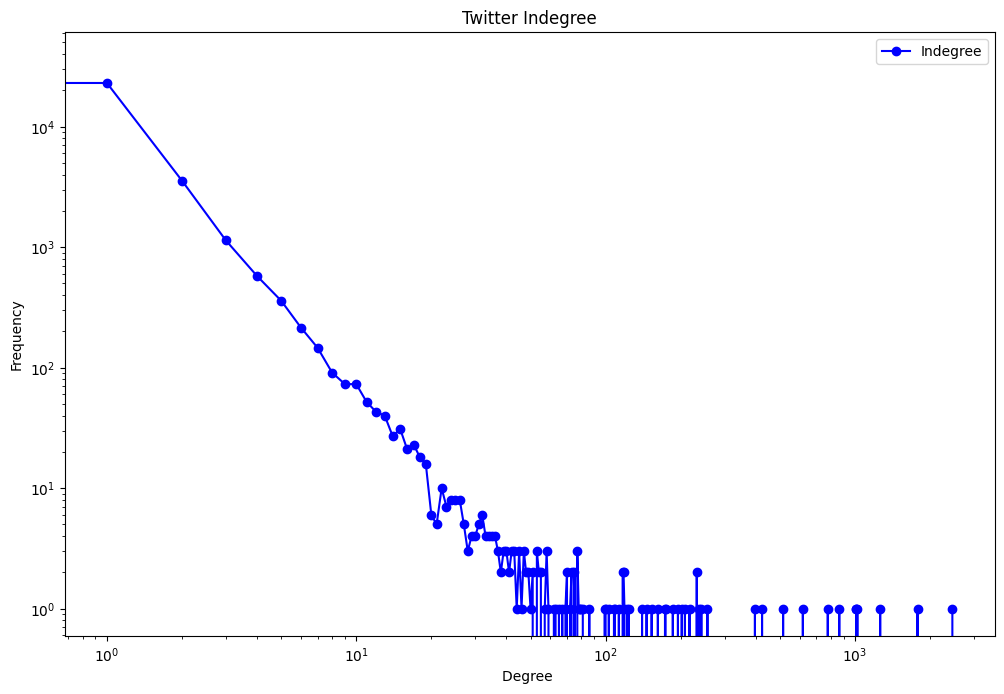

In [ ]:
in_degree_freq = degree_dis(Gi, in_degree=True)
out_degree_freq = degree_dis(Gi, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8), dpi=100,) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'bo-', label='in-degree') 
#plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'ro-', label='out-degree')
plt.tick_params(axis='x', which='major',)
plt.legend(['Indegree'])
plt.title('Twitter Indegree')
plt.xlabel('Degree ')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

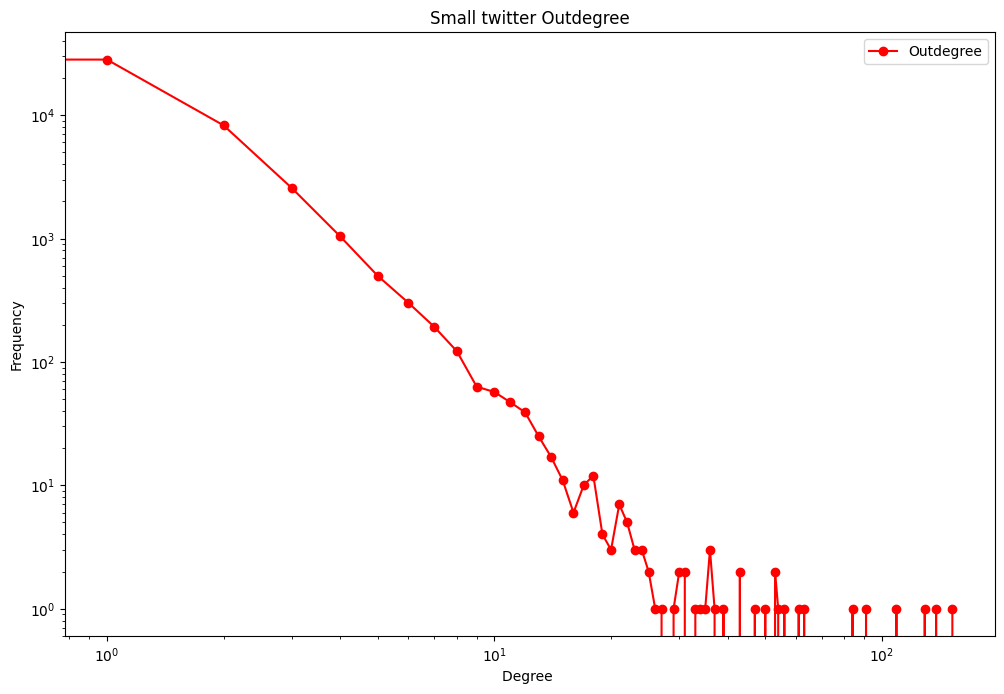

In [ ]:
in_degree_freq = degree_dis(Gi, in_degree=True)
out_degree_freq = degree_dis(Gi, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8), dpi=100,) 
# plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'bo', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'ro-', label='out-degree')
plt.tick_params(axis='x', which='major',)
plt.legend([ 'Outdegree'])
plt.title('Small twitter Outdegree')
plt.xlabel('Degree ')
plt.ylabel('Frequency')

In [ ]:
G2 = new_g.to_undirected()

In [ ]:
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G0 = G2.subgraph(Gcc[0])

In [ ]:
G0

In [ ]:
import random

In [ ]:
J1= G2.subgraph(G0)
nofs1=round(0.05*J1.number_of_nodes())

dummy = random.sample(J1.nodes(), nofs1)
dummy_sg= J1.subgraph(dummy)
print(dummy_sg.number_of_nodes())

1988


In [ ]:
import numpy as np
from matplotlib import pyplot


In [ ]:


leng = dict(nx.all_pairs_shortest_path_length(G0))

leng

def NestedDictValues(G0):
    for v in G0.values():
         if isinstance(v, dict):
           yield from NestedDictValues(v)
         else:
          yield v
Dis = list(NestedDictValues(leng))
Dis.sort()
labels, counts = np.unique(Dis,return_counts=True)
ticks = range(len(counts))
pyplot.yscale('log')
plt.linear(ticks,counts)
plt.xticks(ticks, labels)
plt.xlabel('Distance')
#plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Distance distribution twitter small')
#plt.yscale('log')
plt.show()

KeyboardInterrupt: ignored